In [1]:
import numpy as np
# import neo # 同样没有用上，但是也做出了正确的图像
import mne
import matplotlib.pyplot as plt

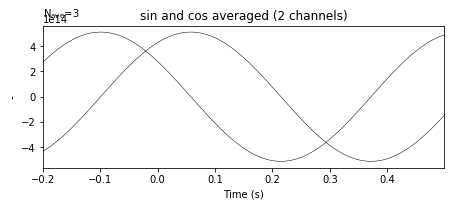

In [5]:
"""设置event id,用来识别events."""

event_id = 1

# 第一列表示样本编号

events = np.array([[200, 0, event_id],
                   [1200, 0, event_id],
                   [2000, 0, event_id]])

  # List of three arbitrary events
    
sfreq = 1000
  # 采样频率

times = np.arange(0, 10, 0.001)
  # Use 10000 samples (10s)
    
sin = np.sin(times * 10)
  # 乘以 10 缩短周期

cos = np.cos(times * 10)
"""利用sin和cos创建一个2个通道的700 ms epochs的数据集
只要是(n_epochs, n_channels, n_times)形状的数据，都可以被用来创建"""
epochs_data = np.array([[sin[:700], cos[:700]],
                        [sin[1000:1700], cos[1000:1700]],
                        [sin[1800:2500], cos[1800:2500]]])


ch_names = ['sin', 'cos']
ch_types = ['mag', 'mag']


info = mne.create_info(ch_names=ch_names,
                       sfreq=sfreq,
                       ch_types=ch_types)

nave = len(epochs_data)
  # Number of averaged
     
    
#  epochs
evoked_data = np.mean(epochs_data, axis=0)
evokeds = mne.EvokedArray(evoked_data,
                          info=info,
                          tmin=-0.2,
                          comment='Arbitrary',
                          nave=nave)
                       
picks = mne.pick_types(info, meg=True, eeg=False, misc=False)
evokeds.plot(picks=picks, 
             show=True, 
             units={'mag': '-'},
             titles={'mag': 'sin and cos averaged'}, 
             time_unit='s')
plt.show()
